# **Data Preparation**

So, we have our .csv files of the songs, one time with 1000, the other time with 5000 songs and what we maybe come up with later to have fun.
Our learning platform also provides us with further information about the columns:

**acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. - *Float*  
**danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	- *Float*  
**duration_ms** - The duration of the track in milliseconds. - *Integer*  
**energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. - *Float*  
**instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. - *Float*  
**key** - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. - *Integer*  
**liveness** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. - *Float*  
**loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. - *Float*  
**mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. - *Integer*  
**speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. - *Float*  
**tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. - *Float*  
**time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). - *Integer*  
**valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	*Float*  

We now have to choose which columns are worth to keep based on these informations and our own thoughts about it and store them in a new dataframe we even might want to turn into a .csv.

## **1. Importing the needed modules and .csv files**

In [6]:
# We want pandas and our scaler:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# We keep .csv files in same path as our project so we easy navigate to them:

df_5000 = pd.read_csv(r'df_audio_features_5000.csv',skipinitialspace=True)


## **2. Inspecting the DataFrame to Clean it** 

In [7]:
#Basic pandas stuff:
# df_1000.info() # Put/Remove comment to read/see
# df_1000.sample(5) # Put/Remove comment to read/see
# df_5000.sample(5) # Put/Remove comment to read/see


### Conclusion here:
* we want to combine artist and name into one column (might be covers on some datasets) 
* drop the other 2 columns with Dtype = object ('id','html'), we need only numbers...
* drop 'key', 'mode', 'type', 'duration_ms', 'time_signature', since they seem meaningless for us.

# 3. Preparing the data:


### 3.1 5000 songs df:

In [9]:
df_5000.columns = df_5000.columns.str.strip()
df_5000['title'] = df_5000['name'] + ' - ' + df_5000['artist']
clustersongs_5000 = df_5000[['title','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','time_signature','valence','tempo']]
clustersongs_5000.set_index('title', inplace=True)

## **4. Different Scaler:**

In [5]:
 #pip install scikit-learn  --upgrade

Note: you may need to restart the kernel to use updated packages.


# 4.1 Min and Max Scaling for 5000 songs

In [17]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Create DataFrame of MinMax scaled values
my_scaler = MinMaxScaler().set_output(transform='pandas')
min_max_df = my_scaler.fit_transform(clustersongs_5000)

# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': clustersongs_5000.iloc[:,1], 
    'min_max_scale': min_max_df.iloc[:,1]
}).sort_values(by='original')

original  min_max_scale
title                                                                      
Shake It Off - Taylor Swift                    ...  0.000000       0.000000
Track3a (2waynice) - Keith Fullerton Whitman   ...  0.000020       0.000020
Deborah's Theme (From "Once upon a Time in Amer...  0.000436       0.000436
Handel Sarabande Variation (Arr. for Piano from...  0.000791       0.000791
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ...  0.000930       0.000930
...                                                      ...            ...
Ich bin ein Döner - Single Version - Tim Toupet...  0.999000       0.999000
Supa Deutschland - Medley - Mickie Krause      ...  0.999000       0.999000
Raped in Their Own Blood - Vomitory            ...  0.999000       0.999000
Armies Of The Dead - Post Mortem               ...  0.999000       0.999000
Bonesaw - Autopsy                              ...  1.000000       1.000000

[5235 rows x 2 columns]

# Distribution

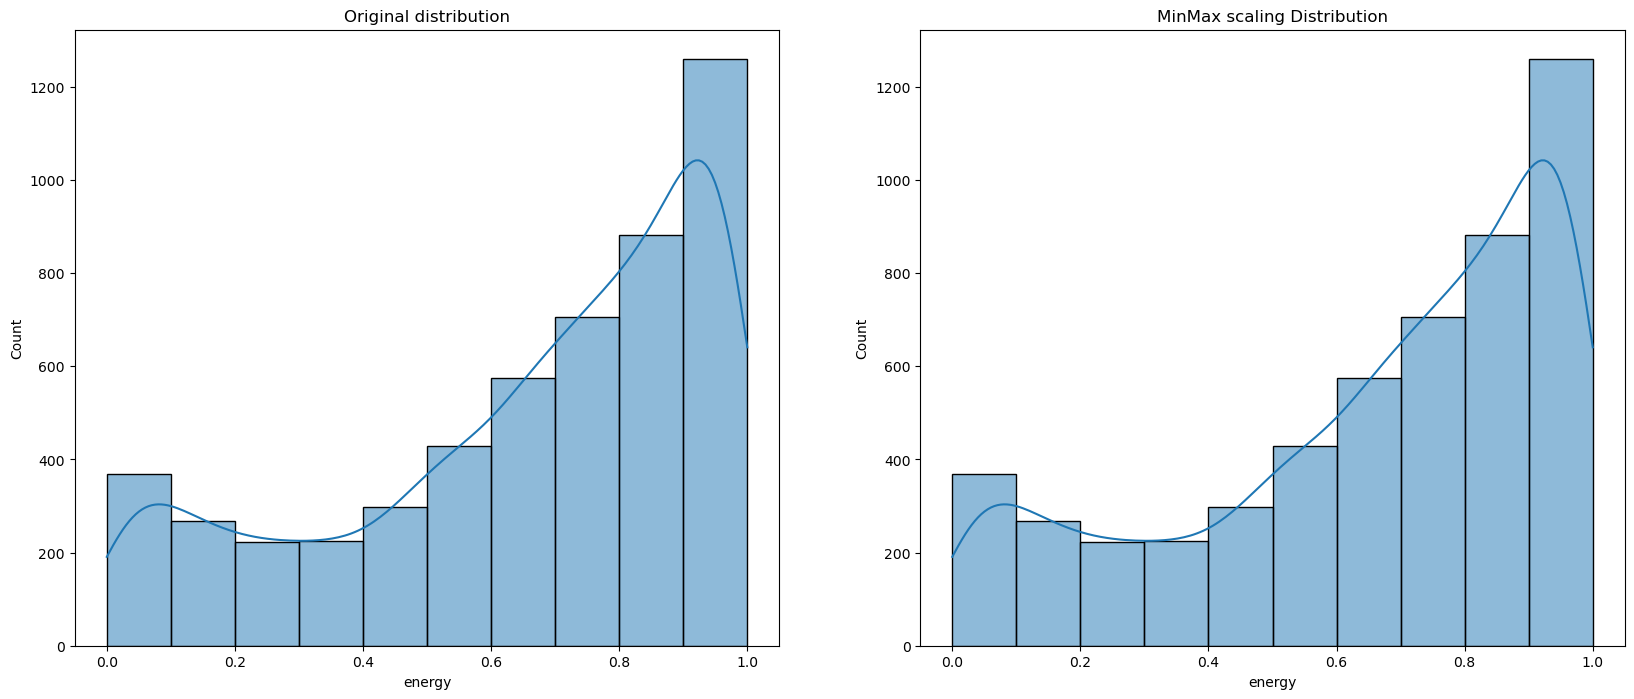

In [18]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=clustersongs_5000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(min_max_df.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('MinMax scaling Distribution')

plt.show()

# 4.2 standard Scaling for 5000 songs

In [19]:
standart = StandardScaler(with_mean=True, with_std=True).set_output(transform='pandas')
scaled_5000 = standart.fit_transform(clustersongs_5000)
scaled_5000.to_csv('5000standart.csv')
scaled_5000.sample(5)

danceability    energy  \
title                                                                        
Taj Mahal - Jorge Ben Jor                      ...      0.355458  0.171467   
Salt Shaker - Ying Yang Twins                  ...      1.717717  0.150656   
Nothing but Fear - Morbid Angel                ...     -0.864613  0.927605   
Hey - Andreas Bourani                          ...     -0.245404 -0.955802   
Finlandia, Op.26 - Jean Sibelius               ...     -1.236138 -1.361618   

                                                         key  loudness  \
title                                                                    
Taj Mahal - Jorge Ben Jor                      ...  0.208769  0.563864   
Salt Shaker - Ying Yang Twins                  ...  1.608851  0.526846   
Nothing but Fear - Morbid Angel                ...  0.488785  0.064678   
Hey - Andreas Bourani                          ... -1.191314 -0.047329   
Finlandia, Op.26 - Jean Sibelius               ...  0.768802 -1.227613   

                                                        mode  speechiness  \
title                                                                       
Taj Mahal - Jorge Ben Jor                      ... -1.351545    -0.387409   
Salt Shaker - Ying Yang Twins                  ...  0.739894     0.629639   
Nothing but Fear - Morbid Angel                ...  0.739894     1.051068   
Hey - Andreas Bourani                          ...  0.739894    -0.633243   
Finlandia, Op.26 - Jean Sibelius               ...  0.739894    -0.614981   

                                                    acousticness  \
title                                                              
Taj Mahal - Jorge Ben Jor                      ...      0.747173   
Salt Shaker - Ying Yang Twins                  ...     -0.671843   
Nothing but Fear - Morbid Angel                ...     -0.814537   
Hey - Andreas Bourani                          ...      0.957877   
Finlandia, Op.26 - Jean Sibelius               ...      1.764168   

                                                    instrumentalness  \
title                                                                  
Taj Mahal - Jorge Ben Jor                      ...         -0.694283   
Salt Shaker - Ying Yang Twins                  ...         -0.694283   
Nothing but Fear - Morbid Angel                ...          0.317451   
Hey - Andreas Bourani                          ...         -0.694283   
Finlandia, Op.26 - Jean Sibelius               ...          1.688013   

                                                    liveness  time_signature  \
title                                                                          
Taj Mahal - Jorge Ben Jor                      ...  2.748720        0.230889   
Salt Shaker - Ying Yang Twins                  ... -0.611488        0.230889   
Nothing but Fear - Morbid Angel                ... -0.938807        0.230889   
Hey - Andreas Bourani                          ... -0.551245        0.230889   
Finlandia, Op.26 - Jean Sibelius               ... -0.437453        0.230889   

                                                     valence     tempo  
title                                                                   
Taj Mahal - Jorge Ben Jor                      ...  1.013342  0.629516  
Salt Shaker - Ying Yang Twins                  ... -0.437872 -0.586591  
Nothing but Fear - Morbid Angel                ... -1.006834  0.605396  
Hey - Andreas Bourani                          ... -1.053647  0.599515  
Finlandia, Op.26 - Jean Sibelius               ... -1.393584 -1.643452

# Distribution

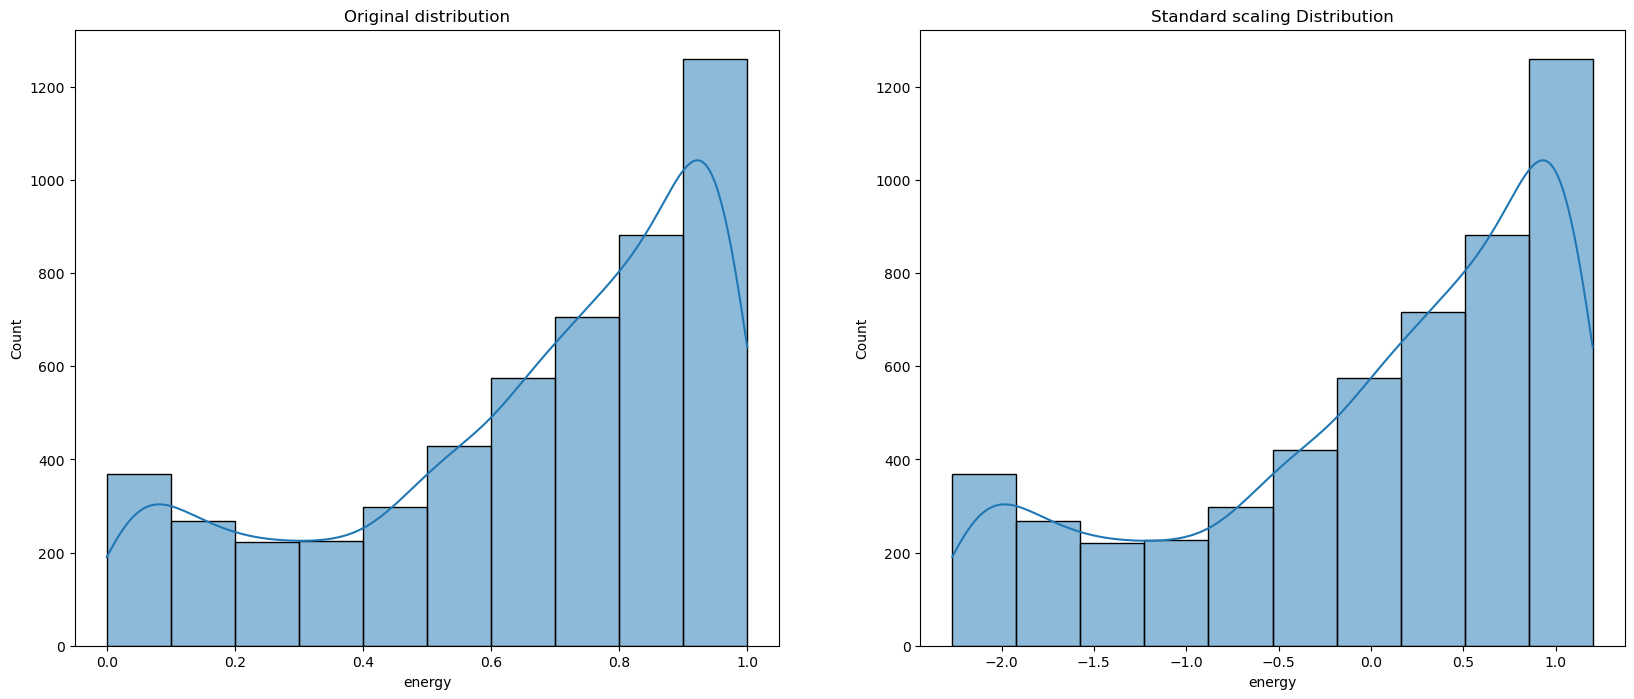

In [20]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=clustersongs_5000.iloc[:,1], bins=10, kde=True, ax=ax1);
sns.histplot(scaled_5000.iloc[:,1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Original distribution')
ax2.set_title('Standard scaling Distribution')

plt.show()

# 4.3 Robust Scaling for 5000 songs

In [13]:
robust = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False).set_output(transform='pandas')
robust_5000 = robust.fit_transform(clustersongs_5000)
robust_5000.to_csv('5000robust.csv')
robust_5000.sample(5)

danceability    energy  \
title                                                                        
Summer in the City - Remastered - The Lovin' Sp...     -0.306069 -0.137681   
Slow String Instrumental - Van Vogel Ensemble  ...     -1.015831 -1.701932   
You Don't Know - Eminem                        ...      0.601583  0.304348   
Midnight Blue - Remastered - Kenny Burrell     ...      0.298153 -0.922705   
Les Contes d'Hoffmann: Barcarolle - Jacques Off...     -0.926121 -1.710386   

                                                         key  loudness  mode  \
title                                                                          
Summer in the City - Remastered - The Lovin' Sp...  0.833333 -0.398156   0.0   
Slow String Instrumental - Van Vogel Ensemble  ... -0.500000 -3.415445  -1.0   
You Don't Know - Eminem                        ...  0.833333  0.904166  -1.0   
Midnight Blue - Remastered - Kenny Burrell     ...  0.000000 -1.053022  -1.0   
Les Contes d'Hoffmann: Barcarolle - Jacques Off... -0.500000 -3.737033   0.0   

                                                    speechiness  acousticness  \
title                                                                           
Summer in the City - Remastered - The Lovin' Sp...    -0.268231     -0.064293   
Slow String Instrumental - Van Vogel Ensemble  ...    -0.087175      1.535565   
You Don't Know - Eminem                        ...     1.294216     -0.148832   
Midnight Blue - Remastered - Kenny Burrell     ...    -0.233026      0.800284   
Les Contes d'Hoffmann: Barcarolle - Jacques Off...    -0.331936      1.485836   

                                                    instrumentalness  \
title                                                                  
Summer in the City - Remastered - The Lovin' Sp...         -0.002649   
Slow String Instrumental - Van Vogel Ensemble  ...          1.286347   
You Don't Know - Eminem                        ...         -0.002924   
Midnight Blue - Remastered - Kenny Burrell     ...         -0.002764   
Les Contes d'Hoffmann: Barcarolle - Jacques Off...          0.913096   

                                                    liveness  time_signature  \
title                                                                          
Summer in the City - Remastered - The Lovin' Sp... -0.249827             0.0   
Slow String Instrumental - Van Vogel Ensemble  ... -0.138408            -3.0   
You Don't Know - Eminem                        ... -0.202768             0.0   
Midnight Blue - Remastered - Kenny Burrell     ...  0.048443             0.0   
Les Contes d'Hoffmann: Barcarolle - Jacques Off...  1.598616            -1.0   

                                                     valence     tempo  
title                                                                   
Summer in the City - Remastered - The Lovin' Sp...  0.297297 -0.230387  
Slow String Instrumental - Van Vogel Ensemble  ... -0.786902  0.402801  
You Don't Know - Eminem                        ...  0.686071 -0.890606  
Midnight Blue - Remastered - Kenny Burrell     ...  0.297297  0.783247  
Les Contes d'Hoffmann: Barcarolle - Jacques Off... -0.692516 -1.063707

# 4.4 Quaqntile 5000 songs

In [14]:
quantile = QuantileTransformer(n_quantiles=10, output_distribution='uniform', ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True).set_output(transform='pandas')
quantile_5000 = quantile.fit_transform(clustersongs_5000)
quantile_5000.to_csv('5000quantile.csv')
quantile_5000.sample(5)

danceability    energy  \
title                                                                        
L'elisir d'amore / Act 2: "Una furtiva lagrima"...      0.086934  0.056426   
Escape (Into The Sunset) - Radio Mix - Quintino...      0.546784  0.599899   
What's The Rush - Johnny Hodges                ...      0.350085  0.016952   
Valley of the Kings - Equinox                  ...      0.084877  0.544959   
All Mine - Kanye West                          ...      0.975439  0.166986   

                                                         key  loudness  mode  \
title                                                                          
L'elisir d'amore / Act 2: "Una furtiva lagrima"...  0.888889  0.109029   1.0   
Escape (Into The Sunset) - Radio Mix - Quintino...  0.277778  0.518107   1.0   
What's The Rush - Johnny Hodges                ...  0.333333  0.098858   1.0   
Valley of the Kings - Equinox                  ...  0.555556  0.456320   0.0   
All Mine - Kanye West                          ...  1.000000  0.587574   0.0   

                                                    speechiness  acousticness  \
title                                                                           
L'elisir d'amore / Act 2: "Una furtiva lagrima"...     0.366197      0.981481   
Escape (Into The Sunset) - Radio Mix - Quintino...     0.691494      0.280939   
What's The Rush - Johnny Hodges                ...     0.119826      0.959877   
Valley of the Kings - Equinox                  ...     0.442879      0.019952   
All Mine - Kanye West                          ...     0.914869      0.526523   

                                                    instrumentalness  \
title                                                                  
L'elisir d'amore / Act 2: "Una furtiva lagrima"...          0.402945   
Escape (Into The Sunset) - Radio Mix - Quintino...          0.361909   
What's The Rush - Johnny Hodges                ...          0.736649   
Valley of the Kings - Equinox                  ...          0.287672   
All Mine - Kanye West                          ...          0.000000   

                                                    liveness  time_signature  \
title                                                                          
L'elisir d'amore / Act 2: "Una furtiva lagrima"...  0.401709             0.5   
Escape (Into The Sunset) - Radio Mix - Quintino...  0.896938             0.5   
What's The Rush - Johnny Hodges                ...  0.427350             0.5   
Valley of the Kings - Equinox                  ...  0.858364             0.5   
All Mine - Kanye West                          ...  0.255795             0.5   

                                                     valence     tempo  
title                                                                   
L'elisir d'amore / Act 2: "Una furtiva lagrima"...  0.087913  0.102968  
Escape (Into The Sunset) - Radio Mix - Quintino...  0.217093  0.666430  
What's The Rush - Johnny Hodges                ...  0.342995  0.067655  
Valley of the Kings - Equinox                  ...  0.242105  0.137288  
All Mine - Kanye West                          ...  0.326316  0.546723

# 4.5 Power 5000 songs

In [15]:
power = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).set_output(transform='pandas')
power_5000 = power.fit_transform(clustersongs_5000)
power_5000.to_csv('5000power.csv')
power_5000.sample(5)

danceability    energy  \
title                                                                        
Where Are Ü Now (with Justin Bieber) - Jack Ü  ...     -0.375767  0.328266   
A New Error - Moderat                          ...      0.128519  0.100674   
Rage Within - Resurrection                     ...     -0.974714  1.358848   
Starboy - The Weeknd                           ...      0.781061 -0.434549   
Disco Pogo - Atzen Musik Mix - Die Atzen       ...      0.653015  0.282432   

                                                         key  loudness  \
title                                                                    
Where Are Ü Now (with Justin Bieber) - Jack Ü  ... -0.230296  1.086174   
A New Error - Moderat                          ...  1.451493 -0.351925   
Rage Within - Resurrection                     ...  1.018029  0.549401   
Starboy - The Weeknd                           ...  0.553114  0.189860   
Disco Pogo - Atzen Musik Mix - Die Atzen       ...  1.451493  0.798474   

                                                        mode  speechiness  \
title                                                                       
Where Are Ü Now (with Justin Bieber) - Jack Ü  ... -1.351545    -0.196142   
A New Error - Moderat                          ... -1.351545    -0.771623   
Rage Within - Resurrection                     ...  0.739894     1.252338   
Starboy - The Weeknd                           ...  0.739894     1.915705   
Disco Pogo - Atzen Musik Mix - Die Atzen       ... -1.351545     0.697166   

                                                    acousticness  \
title                                                              
Where Are Ü Now (with Justin Bieber) - Jack Ü  ...     -0.698793   
A New Error - Moderat                          ...     -0.677524   
Rage Within - Resurrection                     ...     -1.014019   
Starboy - The Weeknd                           ...      0.018630   
Disco Pogo - Atzen Musik Mix - Die Atzen       ...     -0.940957   

                                                    instrumentalness  \
title                                                                  
Where Are Ü Now (with Justin Bieber) - Jack Ü  ...         -0.774182   
A New Error - Moderat                          ...         -0.774222   
Rage Within - Resurrection                     ...          0.404232   
Starboy - The Weeknd                           ...         -0.774189   
Disco Pogo - Atzen Musik Mix - Die Atzen       ...         -0.774222   

                                                    liveness  time_signature  \
title                                                                          
Where Are Ü Now (with Justin Bieber) - Jack Ü  ... -0.980943        0.162535   
A New Error - Moderat                          ... -1.469169        0.162535   
Rage Within - Resurrection                     ...  1.360227        0.162535   
Starboy - The Weeknd                           ... -0.122057        0.162535   
Disco Pogo - Atzen Musik Mix - Die Atzen       ... -0.669463        0.162535   

                                                     valence     tempo  
title                                                                   
Where Are Ü Now (with Justin Bieber) - Jack Ü  ... -0.873811  0.756761  
A New Error - Moderat                          ...  0.324925 -0.192590  
Rage Within - Resurrection                     ... -1.126032  1.003025  
Starboy - The Weeknd                           ...  0.413422  2.148646  
Disco Pogo - Atzen Musik Mix - Die Atzen       ... -0.502886  0.509752